# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
# Your work here.

In [11]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [12]:
temperature = df.temperature

In [13]:
mean = np.mean(temperature)
mean

98.24923076923078

In [15]:
std = np.std(temperature)
std

0.7303577789050377

To calculate normality of the temperature, we will be needing to compute the ecdf. So defining a function to do the same!

In [16]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

Now we can go ahead with the analysis

In [17]:
samples = np.random.normal(mean, std, size=1000)

x, y = ecdf(temperature)
x_theor, y_theor = ecdf(samples)

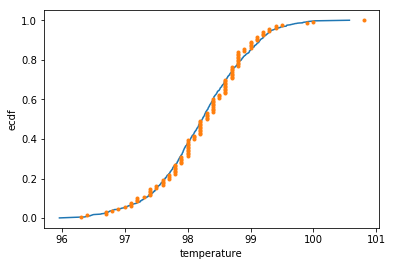

In [21]:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('temperature')
plt.ylabel('ecdf')
plt.show()

Since there is an overlap between the theoretical x and y values and the x and y values obtained from the original data, the body temparture is normally distributed.

Moving on to answer the third question: Is the true population mean really 98.6 degrees F?

We can use a 1 sample hypothesis test to answer this question. 1 sample because we are comparing a set of data to a single quantity.

We will define a function: draw_bs_reps that will give bootstrap replicates

In [25]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
        
    return bs_replicates

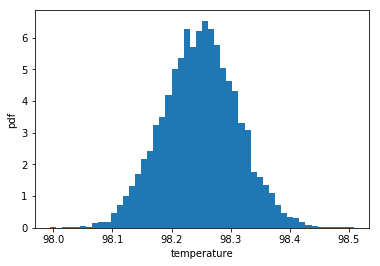

In [26]:
bs_replicates = draw_bs_reps(temperature, np.mean, 10000)

_ = plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('temperature')
plt.ylabel('pdf')
plt.show()

Doesn't look like the true population mean is 98.6 degrees F. We can calculate the p value to know for sure. We will be working under the null hypothesis that the population mean is 98.6

In [31]:
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
p

0.0

A p value of 0 indicates that we will be needing much more than 10000 samples to start seeing the mean value over 98.6
This means that our hypothesis is wrong which means that the true population mean is not 98.6

Onwards towards moving to the next question: At what temperature should we consider someone's temperature to be "abnormal"?

In [33]:
# Calulating 95% confidence interval
CI = np.percentile(bs_replicates, [2.5, 97.5])
CI

array([ 98.12384615,  98.37307692])

As can be seen from the 95% confidence intervals, any temperature below 98.12 and above 98.37 should be counted as abnormal.

Moving on to the next question: Is there a significant difference between males and females in normal temperature?

Let's divide the dataset into two parts: male and female temperatures

In [37]:
m_df = df[df.gender == 'M']
m_temp = m_df.temperature

In [38]:
f_df = df[df.gender == 'F']
f_temp = f_df.temperature

In [39]:
mean_male_temperature = np.mean(m_temp)
mean_male_temperature

98.1046153846154

In [40]:
mean_female_temperature = np.mean(f_temp)
mean_female_temperature

98.39384615384613

Looks like the mean female body temperatures are a bit higher. Is this by chance or is this really the case? We can do a 2 sample test here!

The Null hypothesis is that the body temperature does not vary with gender

In [49]:
mean_temperature_obs = np.mean(m_temp) - np.mean(f_temp)

temperature_concat = np.concatenate((m_temp, f_temp))
mean_temperature = np.mean(temperature_concat)

m_temp_shift = m_temp - np.mean(m_temp) + mean_temperature
f_temp_shift = f_temp - np.mean(f_temp) + mean_temperature

bs_rep_m = draw_bs_reps(m_temp_shift, np.mean, 10000)
bs_rep_f = draw_bs_reps(f_temp_shift, np.mean, 10000)

bs_reps = bs_rep_m - bs_rep_f

p = np.sum(bs_reps <= mean_temperature_obs) / 10000
p

0.0106

Since the p-value is very small, our initial hypothesis is wrong. This means that the body temperatur does vary with gender